# Decision Tree

A decision tree is a non-parametric supervised learning algorithm for classification and regression tasks. It has a hierarchical tree structure consisting of a root node, branches, internal nodes, and leaf nodes. Decision trees are used for classification and regression tasks, providing easy-to-understand models.

A decision tree is a hierarchical model used in decision support that depicts decisions and their potential outcomes, incorporating chance events, resource expenses, and utility. This algorithmic model utilizes conditional control statements and is non-parametric, supervised learning, useful for both classification and regression tasks. The tree structure is comprised of a root node, branches, internal nodes, and leaf nodes, forming a hierarchical, tree-like structure.

It is a tool that has applications spanning several different areas. Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud=pd.read_csv('Fraud_check.csv')

In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [6]:
fraud.shape

(600, 6)

In [7]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
fraud[fraud.duplicated()].shape

(0, 6)

In [10]:
fraud[fraud.duplicated()].sum()

Undergrad          0.0
Marital.Status     0.0
Taxable.Income     0.0
City.Population    0.0
Work.Experience    0.0
Urban              0.0
dtype: float64

In [11]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [12]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [13]:
fraud.value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
NO         Divorced        10329           140885           7                YES      1
YES        Married         21966           117250           20               YES      1
                           26679           79683            26               NO       1
                           26741           176050           20               NO       1
                           26793           162777           7                NO       1
                                                                                     ..
NO         Single          22054           91889            16               NO       1
                           22258           63622            17               NO       1
                           23884           111105           8                YES      1
                           24557           32450            19               YES      1
YES        Single          99619     

In [14]:
fraud.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [15]:
# preprocess categorical input column
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [16]:
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [17]:
# convertion of numerical values of Taxable.Income column to categorical values
fraud['Taxable.Income'] = np.where(fraud['Taxable.Income'] <= 30000, 'Risky', 'Good')
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,Good,50047,10,0,0,1,1
1,Good,134075,18,1,0,0,1
2,Good,160205,30,0,1,0,1
3,Good,193264,15,1,0,1,1
4,Good,27533,28,0,1,0,0


In [18]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Taxable.Income          600 non-null    object
 1   City.Population         600 non-null    int64 
 2   Work.Experience         600 non-null    int64 
 3   Undergrad_YES           600 non-null    uint8 
 4   Marital.Status_Married  600 non-null    uint8 
 5   Marital.Status_Single   600 non-null    uint8 
 6   Urban_YES               600 non-null    uint8 
dtypes: int64(2), object(1), uint8(4)
memory usage: 16.5+ KB


In [19]:
# check VIF for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

X=fraud.iloc[:,1:]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_dfs = []
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_dfs.append(vif_data)
vif_dfs


[                  feature       VIF
 0         City.Population  3.756613
 1         Work.Experience  3.082809
 2           Undergrad_YES  1.993031
 3  Marital.Status_Married  1.830275
 4   Marital.Status_Single  1.923789
 5               Urban_YES  1.828304]

#### Here VIF is <5 For All The Variables .This is acceptable for Our Analysis

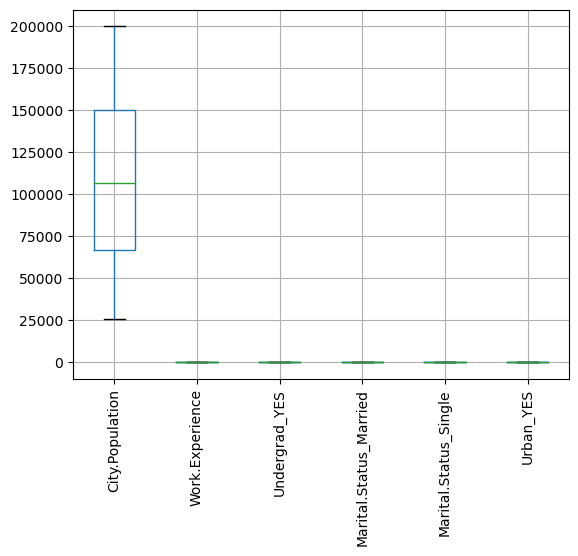

In [20]:
# Checking For The Outliers
fraud.boxplot();
plt.xticks(rotation=90);

#### There Are No Outliers So Data is Good To Go For Model Building

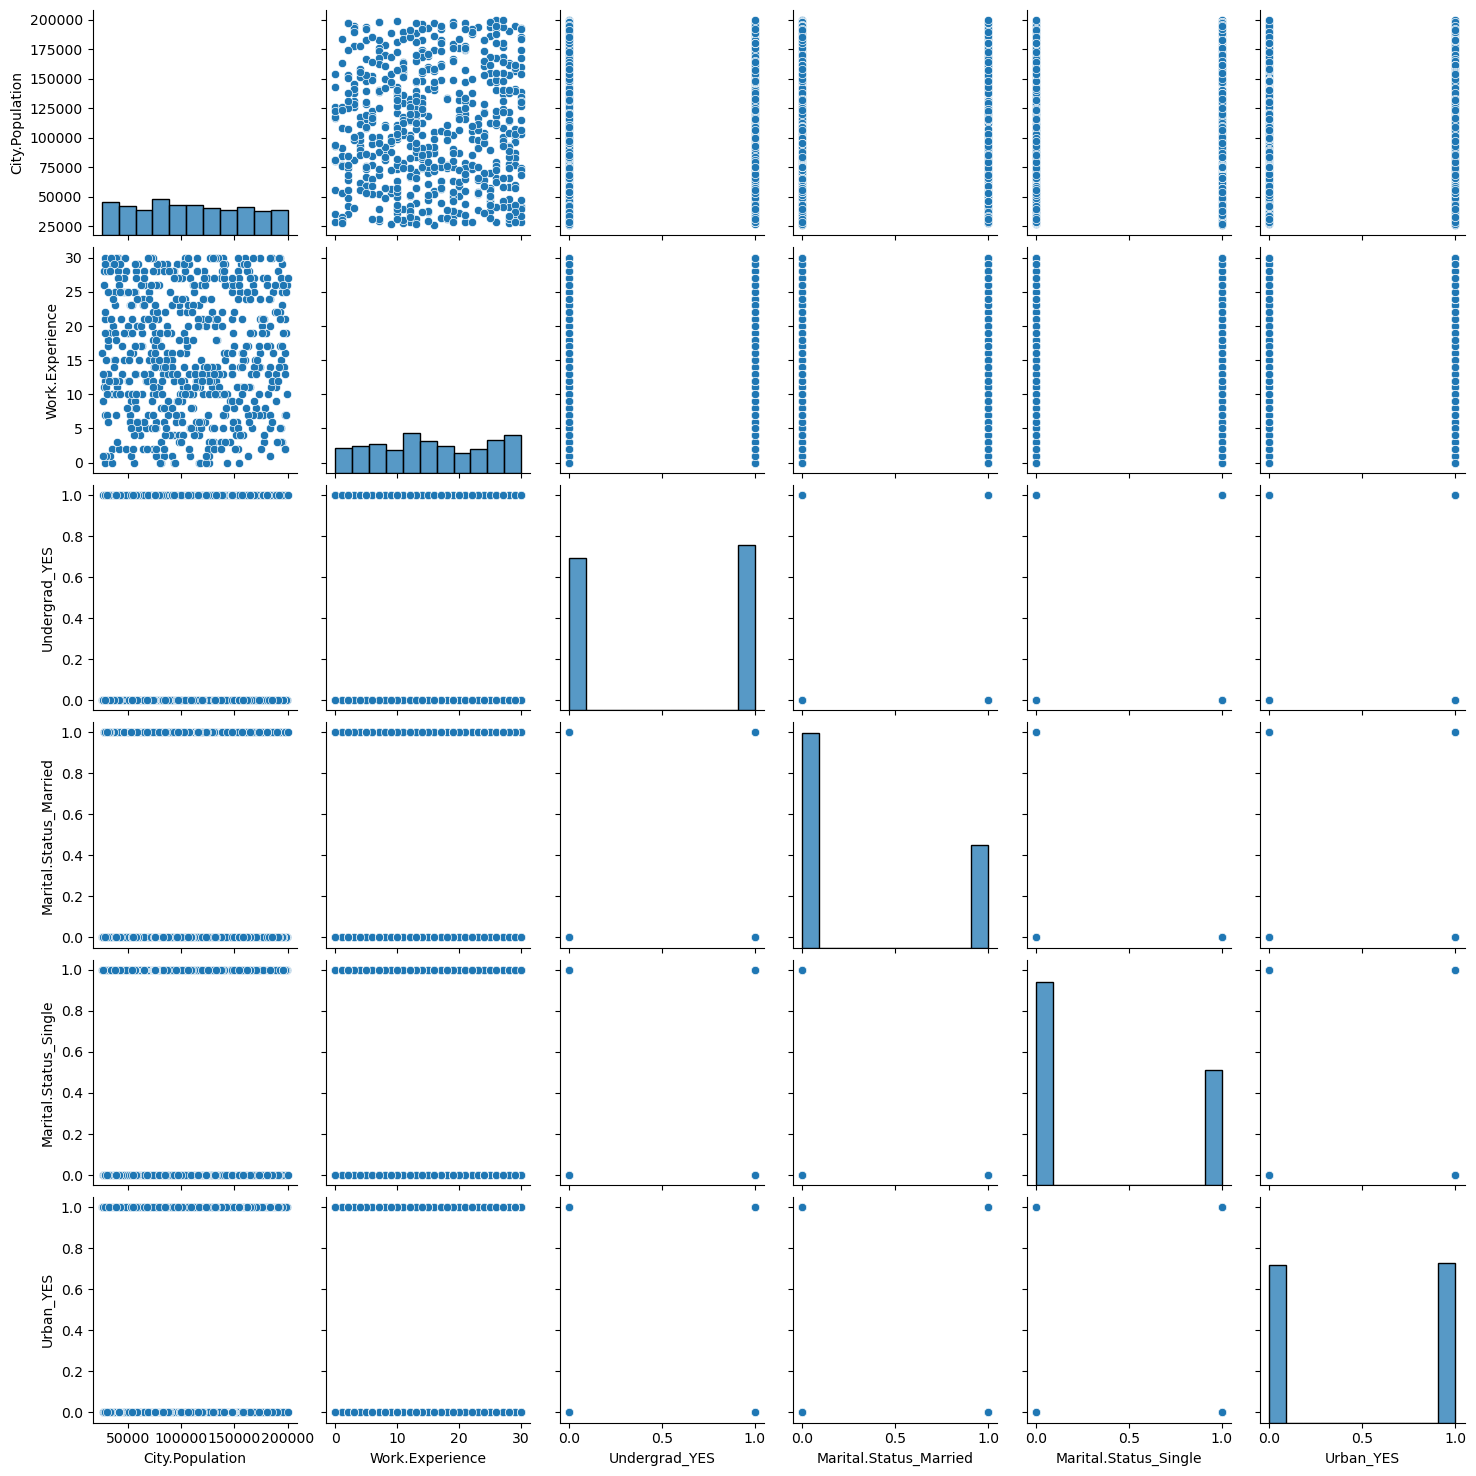

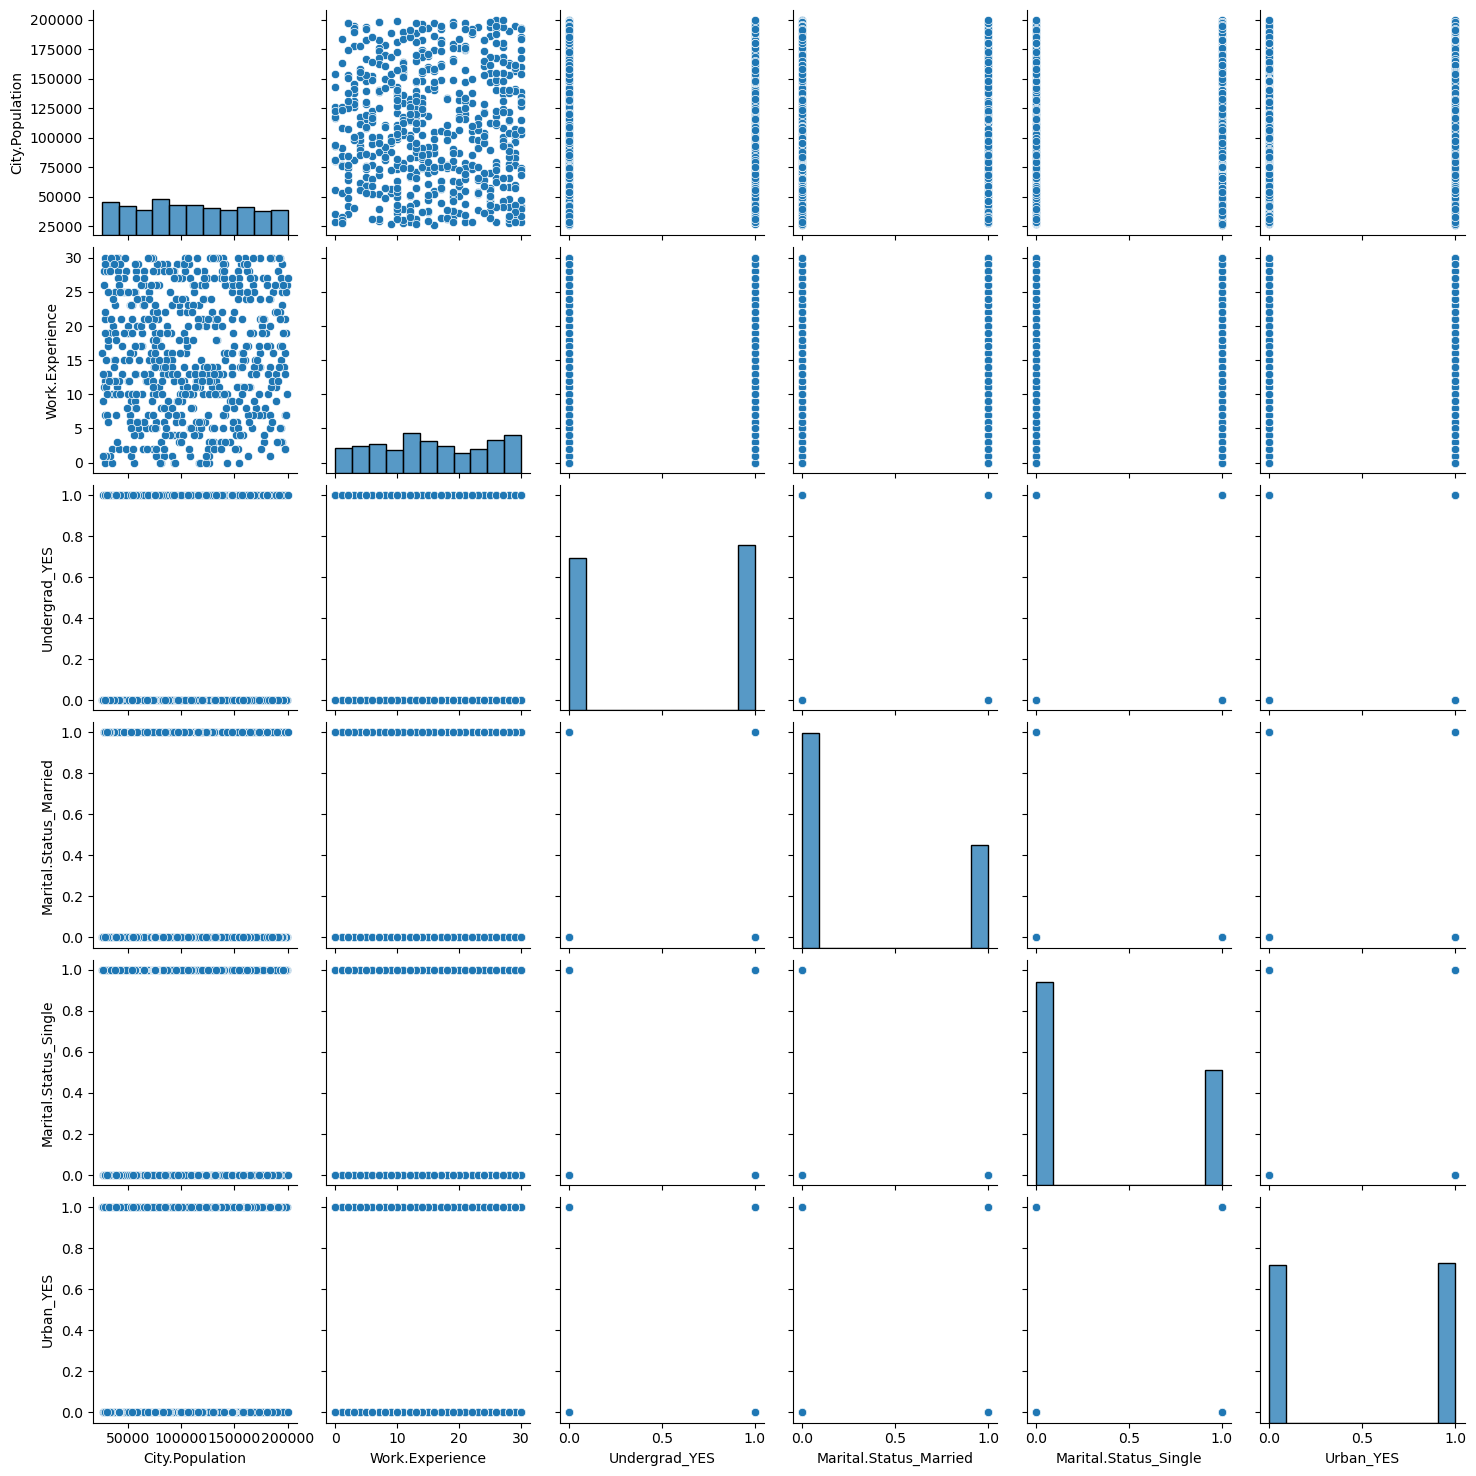

In [22]:
sns.pairplot(fraud)
plt.show()

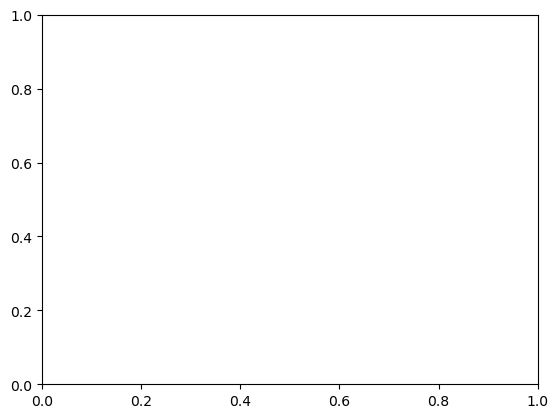

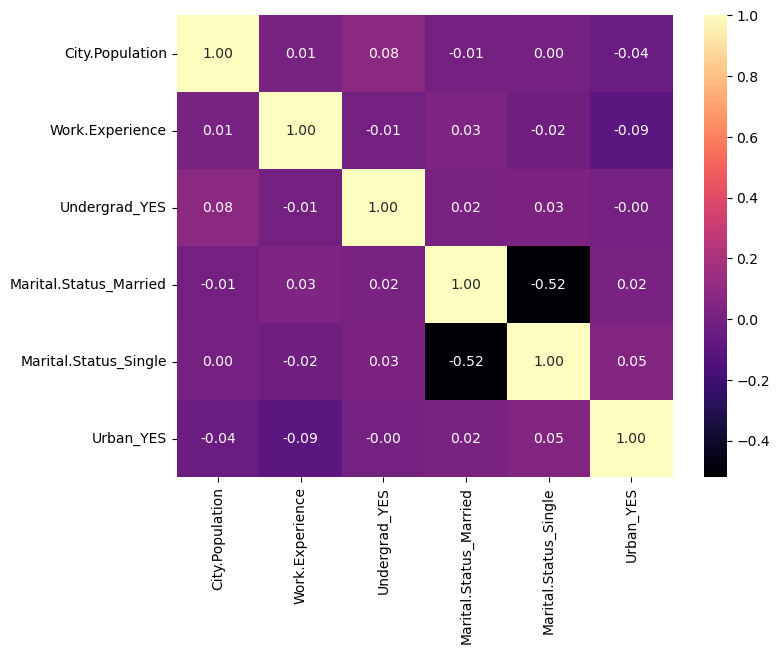

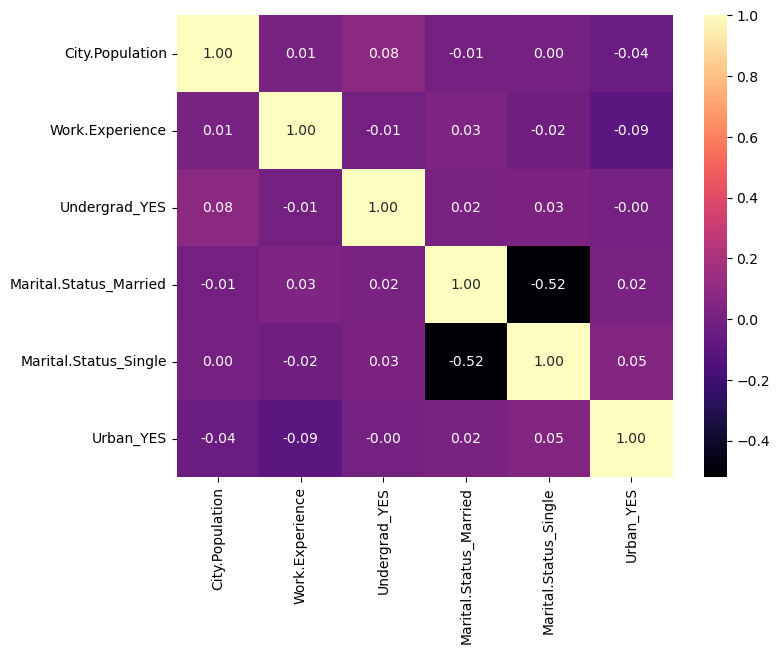

In [25]:
plt.figure(figsize = (8, 6));
sns.heatmap(fraud.corr(), cmap='magma', annot=True, fmt=".2f")
plt.show()


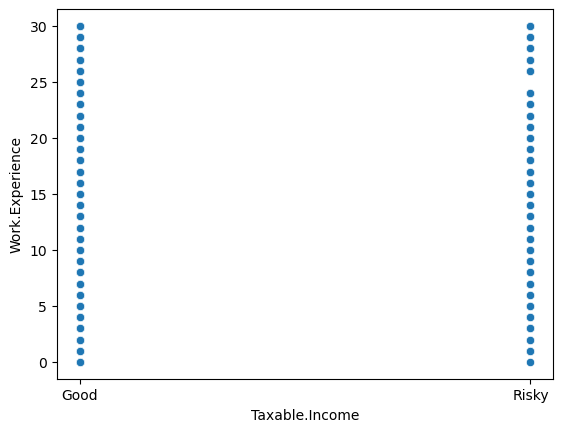

In [26]:
sns.scatterplot(x = 'Taxable.Income', y = 'Work.Experience', data = fraud)
plt.show()


# Decision Tree Model

In [26]:

X=fraud.iloc[:,1:]
y=fraud['Taxable.Income']

In [27]:
# # Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [28]:
X_train

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
145,197422,2,0,0,0,1
9,155482,4,1,0,0,1
375,130935,2,0,1,0,0
523,42198,12,0,0,0,0
188,137569,10,0,0,0,0
...,...,...,...,...,...,...
71,105680,22,0,0,1,0
106,58535,20,1,0,1,1
270,130680,5,0,1,0,0
435,111774,4,0,0,0,1


In [29]:
X_test

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
110,32450,19,0,0,1,1
419,138074,20,0,1,0,0
565,31064,28,0,0,0,0
77,118344,26,1,1,0,0
181,36116,20,0,0,0,0
...,...,...,...,...,...,...
399,74497,21,0,0,1,0
340,54437,21,1,1,0,1
148,197038,21,0,1,0,0
494,197045,13,0,0,1,1


In [30]:
y_train

145     Good
9       Good
375     Good
523     Good
188    Risky
       ...  
71      Good
106    Risky
270     Good
435     Good
102     Good
Name: Taxable.Income, Length: 480, dtype: object

In [31]:
y_test

110    Risky
419     Good
565     Good
77      Good
181    Risky
       ...  
399     Good
340     Good
148     Good
494     Good
439    Risky
Name: Taxable.Income, Length: 120, dtype: object

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV
# Create a DecisionTreeClassifier
model = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
parameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(2, 10),
    'min_samples_split': range(2, 8),
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2']
}

# Create a KFold cross-validator
cv = KFold(n_splits=10)

# Instantiate GridSearchCV
gsv = GridSearchCV(estimator=model, param_grid=parameters, cv=cv, verbose=1, scoring='accuracy')

# Fit the model
gsv.fit(X_train, y_train)

# Get the best parameters and their corresponding test score
best_params = gsv.best_params_
test_score = gsv.best_score_

# Output the best parameters and test score
print("Best Parameters:", best_params)
print("Test Score:", test_score)


Fitting 10 folds for each of 384 candidates, totalling 3840 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 7, 'splitter': 'best'}
Test Score: 0.7979166666666666


In [33]:
# Building The Real model With The Above Parameters which i get after Hyperparameter Tunning Of GridSearch
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                        min_samples_split=7, splitter='best')

model.fit(X_train,y_train)
model_train_score = model.score(X_train,y_train)
model_test_score = model.score(X_test,y_test)

print(f'train score is: {model_train_score} and test score is: {model_test_score}')

train score is: 0.7958333333333333 and test score is: 0.7833333333333333


In [34]:
model.classes_

array(['Good', 'Risky'], dtype=object)

### Both Ttrain And Test Accuracy are Good 

In [36]:
X.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES'],
      dtype='object')

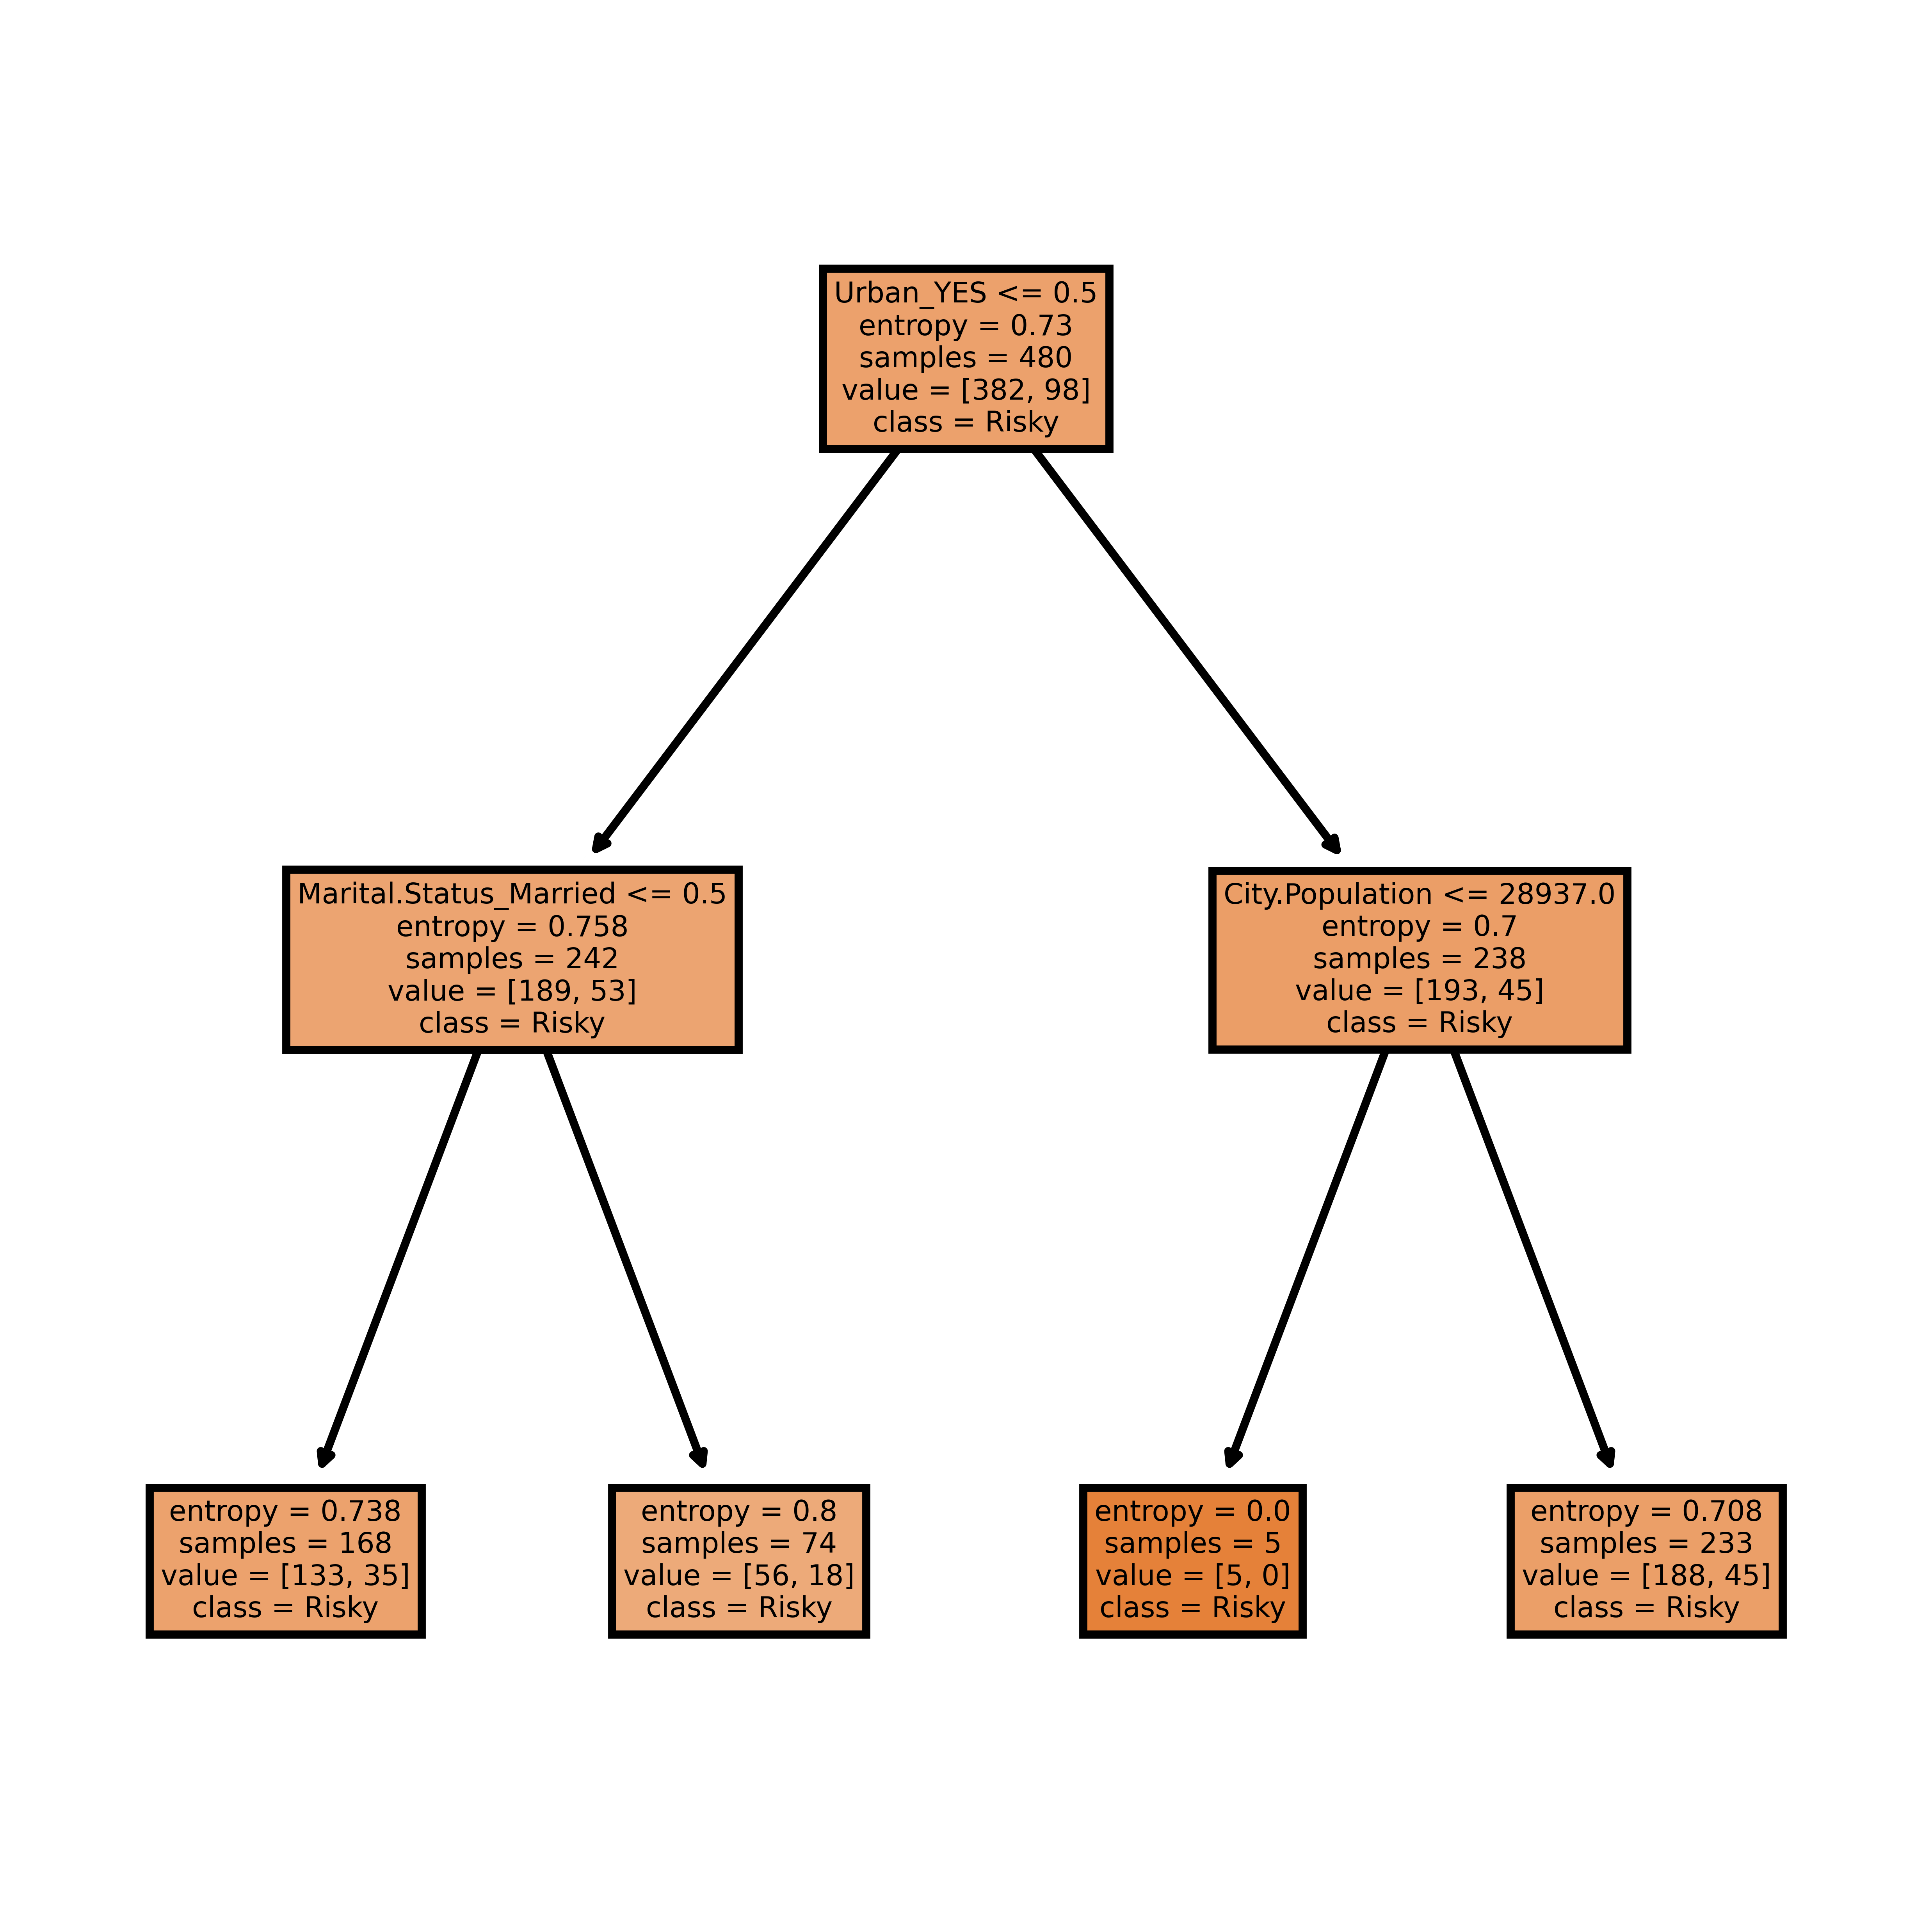

In [37]:
# to view whole decision tree of training data
from sklearn import tree
fn=['City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']#X.columns
cn=['Risky', 'Good']    #target_names

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1500)
tree.plot_tree(model, feature_names = fn, class_names=cn, filled = True);

##### Here Accuracies are coming  Good To Predect, EvenThough Lets Try some Ensembling  Mothods Is There Any Increase in Accuracy

## Ensembling Methods
### 1.Bagging

We use bagging for combining weak learners of high variance. Bagging aims to produce a model with lower variance than the individual weak models. These weak learners are homogenous, meaning they are of the same type.

Bagging is also known as Bootstrap aggregating. It consists of two steps: bootstrapping and aggregation.


The steps of bagging are as follows:

1.We have an initial training dataset containing n-number of instances.

2.We create a m-number of subsets of data from the training set.  We take a subset of N sample points from the initial dataset for each subset. Each subset is taken with replacement. This means that a specific data point can be sampled more than once.

3.For each subset of data, we train the corresponding weak learners independently. These models are homogeneous, meaning that they are of the same type.

4.Each model makes a prediction.

5.The predictions are aggregated into a single prediction. For this, either max voting or averaging is used.

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier


model1 = BaggingClassifier(estimator = DecisionTreeClassifier())

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(2,15), 'max_samples':range(1,10), 'max_features': range(2, len(X.columns))}
gsv = GridSearchCV(estimator = model1, param_grid = parameters, cv = KFold(n_splits = 10), verbose = 400)

gsv.fit(X_train,y_train)
gsv.score(X_train,y_train) 

Fitting 10 folds for each of 468 candidates, totalling 4680 fits
[CV 1/10; 1/468] START max_features=2, max_samples=1, n_estimators=2............
[CV 1/10; 1/468] END max_features=2, max_samples=1, n_estimators=2;, score=0.833 total time=   0.0s
[CV 2/10; 1/468] START max_features=2, max_samples=1, n_estimators=2............
[CV 2/10; 1/468] END max_features=2, max_samples=1, n_estimators=2;, score=0.271 total time=   0.0s
[CV 3/10; 1/468] START max_features=2, max_samples=1, n_estimators=2............
[CV 3/10; 1/468] END max_features=2, max_samples=1, n_estimators=2;, score=0.812 total time=   0.0s
[CV 4/10; 1/468] START max_features=2, max_samples=1, n_estimators=2............
[CV 4/10; 1/468] END max_features=2, max_samples=1, n_estimators=2;, score=0.708 total time=   0.0s
[CV 5/10; 1/468] START max_features=2, max_samples=1, n_estimators=2............
[CV 5/10; 1/468] END max_features=2, max_samples=1, n_estimators=2;, score=0.833 total time=   0.0s
[CV 6/10; 1/468] START max_fea

0.7875

In [39]:
gsv.best_estimator_, gsv.best_score_

(BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=2,
                   max_samples=9, n_estimators=6),
 0.8)

In [40]:
model1 = BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=2,
                   max_samples=9, n_estimators=6)
model1.fit(X_train,y_train)
model1_train_score= model1.score(X_train,y_train)
model1_test_score= model1.score(X_test,y_test)

print(f'train score is: {model1_train_score} and test score is: {model1_test_score}')

train score is: 0.7583333333333333 and test score is: 0.7166666666666667


In [41]:
model1.score(X_test,y_test)

0.7166666666666667

###### Here Accuracy Is still Decresed , so we can go ahead with others Methods

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
# Create a RandomForestClassifier
model2 = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 100, 150],
    'max_depth': range(3, 6)
}

# Create a KFold cross-validator
cv = KFold(n_splits=5)

# Instantiate GridSearchCV
gsv = GridSearchCV(estimator=model2, param_grid=parameters, cv=cv, verbose=1, scoring='accuracy')

# Fit the model
gsv.fit(X_train, y_train)

# Get the best parameters and their corresponding test score
best_params = gsv.best_params_
test_score = gsv.best_score_

# Output the best parameters and test score
print("Best Parameters:", best_params)
print("Test Score:", test_score)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 10}
Test Score: 0.7958333333333334


In [43]:
model2 = RandomForestClassifier(max_depth=3, n_estimators=10)
model2.fit(X_train,y_train)
model2_train_score = model2.score(X_train,y_train)*100
model2_test_score = model2.score(X_test,y_test)*100
print(f'train score is: {model2_train_score} and test score is: {model2_test_score}')

train score is: 79.58333333333333 and test score is: 78.33333333333333


#### There is no significant changes in acuuracy in model on applying random forest ensemble .

# Boosting
We use boosting for combining weak learners with high bias. Boosting aims to produce a model with a lower bias than that of the individual models. Like in bagging, the weak learners are homogeneous.

Boosting involves sequentially training weak learners. Here, each subsequent learner improves the errors of previous learners in the sequence. A sample of data is first taken from the initial dataset. This sample is used to train the first model, and the model makes its prediction. The samples can either be correctly or incorrectly predicted. The samples that are wrongly predicted are reused for training the next model. In this way, subsequent models can improve on the errors of previous models.

Unlike bagging, which aggregates prediction results at the end, boosting aggregates the results at each step. They are aggregated using weighted averaging.

Weighted averaging involves giving all models different weights depending on their predictive power. In other words, it gives more weight to the model with the highest predictive power. This is because the learner with the highest predictive power is considered the most important.

Boosting works with the following steps:

1.We sample m-number of subsets from an initial training dataset.

2.Using the first subset, we train the first weak learner.

3.We test the trained weak learner using the training data. As a result of the testing, some data points will be incorrectly predicted.

3.Each data point with the wrong prediction is sent into the second subset of data, and this subset is updated.

4.Using this updated subset, we train and test the second weak learner.

5.We continue with the following subset until the total number of subsets is reached.

6.We now have the total prediction. The overall prediction has already been aggregated at each step, so there is no need to calculate it.



### 3.Adaboost

It fits a sequence of weak learners on different weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

Mostly, we use decision stamps with AdaBoost. But, we can use any machine learning algorithms as base learner if it accepts weight on training data set. We can use AdaBoost algorithms for both classification and regression problem.


In [45]:
from sklearn.ensemble import AdaBoostClassifier

model3 = AdaBoostClassifier(estimator = DecisionTreeClassifier())

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [0.01, 0.1, 1], 'n_estimators':[50, 100, 150]}
gsv = GridSearchCV(estimator = model3, param_grid = parameters, cv = KFold(n_splits = 5), verbose = 400)

gsv.fit(X_train,y_train)
gsv.score(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START learning_rate=0.01, n_estimators=50.........................
[CV 1/5; 1/9] END learning_rate=0.01, n_estimators=50;, score=0.708 total time=   0.0s
[CV 2/5; 1/9] START learning_rate=0.01, n_estimators=50.........................
[CV 2/5; 1/9] END learning_rate=0.01, n_estimators=50;, score=0.667 total time=   0.0s
[CV 3/5; 1/9] START learning_rate=0.01, n_estimators=50.........................
[CV 3/5; 1/9] END learning_rate=0.01, n_estimators=50;, score=0.688 total time=   0.0s
[CV 4/5; 1/9] START learning_rate=0.01, n_estimators=50.........................
[CV 4/5; 1/9] END learning_rate=0.01, n_estimators=50;, score=0.677 total time=   0.0s
[CV 5/5; 1/9] START learning_rate=0.01, n_estimators=50.........................
[CV 5/5; 1/9] END learning_rate=0.01, n_estimators=50;, score=0.656 total time=   0.0s
[CV 1/5; 2/9] START learning_rate=0.01, n_estimators=100........................
[CV 1/5; 2/9] END l

1.0

In [46]:
gsv.best_estimator_, gsv.best_score_

(AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.1,
                    n_estimators=100),
 0.68125)

In [47]:
model3 = AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.1,n_estimators=100)
model3.fit(X_train,y_train)
model3_train_score = model3.score(X_train,y_train)*100
model3_test_score = model3.score(X_test,y_test)*100

print(f'train score is: {model3_train_score} and test score is: {model3_test_score}')

train score is: 100.0 and test score is: 65.83333333333333


#### This ensemble model is behaving best on Train, but performing very poorly on Test.

# 4. XGBoost
XGBoost is a popular implementation of gradient boosting. 

The gradient boosting ensemble technique consists of three simple steps:

An initial model F0 is defined to predict the target variable y. This model will be associated with a residual (y – F0)
A new model h1 is fit to the residuals from the previous step
Now, F0 and h1 are combined to give F1, the boosted version of F0. The mean squared error from F1 will be lower than that from F0:

F1(x)<-F0(x)+h1(x)

To improve the performance of F1, we could model after the residuals of F1 and create a new model F2:

F2(x)<-F1(x)+h2(x)

This can be done for ‘m’ iterations, until residuals have been minimized as much as possible:

Fm(x)<-F(m-1)(x)+hm(x)

Here, the additive learners do not disturb the functions created in the previous steps. Instead, they impart information of their own to bring down the errors.




In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

fraud2 = pd.DataFrame()
fraud2['Taxable.Income'] = le.fit_transform(fraud['Taxable.Income'])

fraud2['Taxable.Income'].unique()

array([0, 1])

In [50]:
X=fraud.iloc[:,1:]
y=fraud2['Taxable.Income']

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
!pip install xgboost

In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, GridSearchCV

# Create an XGBClassifier
model4 = XGBClassifier()

# Define the parameter grid for GridSearchCV
parameters = {
    'eta': [0, 0.2, 0.4, 0.6, 0.8, 1],
    'gamma': [0, 10, 50],
    'max_depth': range(2, 7),
    'sampling_method': ['uniform', 'gradient_based'],
    'n_estimators': [50, 100, 150]
}

# Create a KFold cross-validator
cv = KFold(n_splits=5)

# Instantiate GridSearchCV
gsv = GridSearchCV(estimator=model4, param_grid=parameters, cv=cv, verbose=1, scoring='accuracy')

# Fit the model
gsv.fit(X_train, y_train)

# Get the best parameters and their corresponding test score
best_params = gsv.best_params_
test_score = gsv.best_score_

# Output the best parameters and test score
print("Best Parameters:", best_params)
print("Test Score:", test_score)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters: {'eta': 0, 'gamma': 0, 'max_depth': 2, 'n_estimators': 50, 'sampling_method': 'uniform'}
Test Score: 0.7958333333333334


In [53]:
model4 = XGBClassifier(eta=0, gamma=0, max_depth=2, n_estimators=50)
model4.fit(X_train,y_train)
model4_train_score = model4.score(X_train,y_train)*100
model4_test_score = model4.score(X_test,y_test)*100
print(f'train score is: {model4_train_score} and test score is: {model4_test_score}')

train score is: 79.58333333333333 and test score is: 78.33333333333333


####  There Is Not That Much change In Both Test and Train Accuracies

In [54]:
accuracies = pd.DataFrame()
accuracies['Model'] = ['Decision Tree', 'Bagging', 'Random Forest', 'Adaboost', 'XGBoost']
accuracies['Train_score'] = [round(model_train_score, 2), round(model1_train_score, 2), round(model2_train_score, 2),
                             round(model3_train_score, 2), round(model4_train_score, 2)]
accuracies['Test_score'] = [round(model_test_score, 2), round(model1_train_score, 2), round(model2_test_score, 2),
                             round(model3_test_score, 2), round(model4_test_score, 2)]
accuracies

,Model,Train_score,Test_score
0,Decision Tree,0.80,0.78
1,Bagging,0.76,0.76
2,Random Forest,79.58,78.33
3,Adaboost,100.00,65.83
4,XGBoost,79.58,78.33


# Final Remarks
Except Adaboost all ensembling techniques used here are giving results similar to original model (DecisionTreeClassifier) as original model has used all applicable parameters and all parameters values are choosen best with the help of Grid Search CV

### A bank if using this model will be able to check for fruad data correctly 80% of the time